In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plt.rcParams["figure.figsize"]=(10,5)

# **EDA -Supermarket Sales**

### **1.Introduction-**
Important decisions are influenced by the data drive insights.We will explore the trasanction level  data sales  data of Supermarket chain, and drive useful business insights.
### **2.Objective-**
The Supermarket chain wants to run  some promotions and they have a fixed budget for the same.Business wants insights from the data on how to most efficiently allocate these funds.

The obejctives are as following-

provide insights to marketing head for allocating funds.the funds should be allocated in such a way so that the promotional return can be maximized.

# **About Data**
-The Data belongs to a supermarket chain in myanmar,with stores in 3 cities.

-This is a sampled data of 1000 transactions and 20 fields for each traction.

-All transactions belong to year 2019.


# **Data Dictionary**

Reading data dictionary,

In [ ]:
data_dict=pd.read_csv("/content/data_dict.csv")
data_dict

,Field,Description
0,Invoice ID,Invoice ID of the transaction
1,Branch,One out of 3 branches. Every city belongs to a...
2,CustomerID,Customer ID of the cutomer doing transaction
3,City,City where the tx took place. The chain has st...
4,Customer Type,Where a member or normal customer
5,Gender,Male or Female
6,Product Line,Product line of the product purchased
7,Unit Price,Unit price of product purchased
8,Quantity,Qty purchased
9,Tax 5%,Tax as a fixed % of invoice


# **Data Wrangling**

Reading the data file.

In [ ]:
sales_data=pd.read_csv("/content/supermarket_sales.csv")
sales_data.head(20).style.background_gradient(cmap="hot")

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.690000,10,37.345000,746.900000,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.100000,96.173500,16.840900
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.280000,6,4.584000,91.680000,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.000000,96.078500,19.763300
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.330000,7,16.215500,324.310000,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.400000,96.173500,16.840900
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.220000,11,32.021000,640.420000,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.400000,96.173500,16.840900
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.310000,7,30.208500,604.170000,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,nan,96.173500,16.840900
5,699-14-3026,C,C1423,Naypyitaw,Normal,Male,Health and beauty,85.390000,8,34.156000,683.120000,06-01-2019,18:30,Ewallet,597.730000,4.761905,85.390000,nan,96.078500,19.763300
6,355-53-5943,A,C1723,Yangon,Normal,Female,Health and beauty,68.840000,6,20.652000,413.040000,15-12-2019,14:36,Ewallet,413.040000,4.761905,0.000000,nan,96.173500,16.840900
7,315-22-5665,C,C1471,Naypyitaw,nan,Female,Health and beauty,73.560000,12,44.136000,882.720000,14-06-2019,11:38,Ewallet,735.600000,4.761905,147.120000,nan,96.078500,19.763300
8,665-32-9167,A,C1707,Yangon,nan,Female,Health and beauty,36.260000,2,3.626000,72.520000,25-11-2019,17:15,Credit card,72.520000,4.761905,0.000000,nan,96.173500,16.840900
9,692-92-5582,B,C1277,Mandalay,nan,Female,Health and beauty,54.840000,4,10.968000,219.360000,10-04-2019,13:27,Credit card,164.520000,4.761905,54.840000,nan,96.089100,21.958800


In [ ]:
sales_data.head()

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.4,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409


Shape of the data

In [ ]:
sales_data.shape

(1000, 20)

Describtion of data

In [ ]:
sales_data.describe().iloc[1:,:]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
mean,55.672130,7.485000,20.966930,419.149340,307.775883,4.761905,111.373457,7.462625,96.114319,19.498590
std,26.494628,4.520643,17.604704,347.824683,234.425682,0.000000,149.212835,1.776179,0.042715,2.106757
min,10.080000,1.000000,0.508500,10.170000,10.170000,4.761905,0.000000,4.000000,96.078500,16.840900
25%,32.875000,4.000000,7.479500,152.745000,118.497500,4.761905,0.000000,5.900000,96.078500,16.840900
50%,55.230000,7.000000,15.468250,317.695000,241.760000,4.761905,63.650000,7.455000,96.089100,19.763300
75%,77.935000,11.000000,30.205875,605.222500,448.905000,4.761905,161.022500,9.100000,96.173500,21.958800
max,99.960000,20.000000,87.498000,1749.960000,993.000000,4.761905,874.980000,10.000000,96.173500,21.958800


**Observation**

-Unit price range is 10.08 to 99.96 with average 55.67.

-Mostly Gross margin is same 4.76%.

-Mean rating is 7.46/10.

-Avg quantity sold 7.48 with range 1 to 20

Check data types and null counts

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   806 non-null    object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            952 non-null    object 
 5   Gender                   975 non-null    object 
 6   Product line             977 non-null    object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   896 non-null    float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  979 non-null    object 
 14  cogs                     

# **Data Imputation**

check count of null values in %

In [ ]:
null_perc=sales_data.isnull().sum()/len(sales_data)*100
null_perc.sort_values(ascending=False)

Branch                     19.4
Rating                     14.3
Tax 5%                     10.4
Customer type               4.8
Gender                      2.5
Product line                2.3
Payment                     2.1
Invoice ID                  0.0
Longitude                   0.0
gross income                0.0
gross margin percentage     0.0
cogs                        0.0
Total                       0.0
Time                        0.0
Date                        0.0
Quantity                    0.0
Unit price                  0.0
City                        0.0
CustomerID                  0.0
Latitude                    0.0
dtype: float64

<AxesSubplot:>

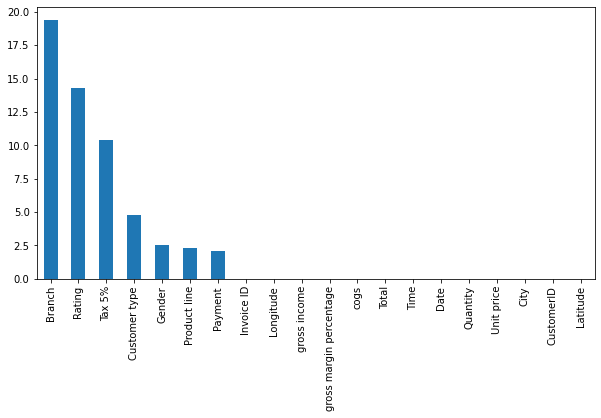

In [ ]:
null_perc.sort_values(ascending=False).plot(kind="bar")

Make a copy of dataset for data wrangling and for further EDA ,in case original needs in future

In [ ]:
sales_data2=sales_data.copy()

Imputing NULLs for Rating column

Putting Rating column's nulls with mean value of that column

In [ ]:
sales_data2.Rating.isnull().sum()

143

In [ ]:
sales_data2["Rating"].mean()

7.462625437572928

In [ ]:
  sales_data2["Rating"]=sales_data2["Rating"].fillna(sales_data2["Rating"].mean())

In [ ]:
sales_data2["Rating"].isnull().sum()

0

To check

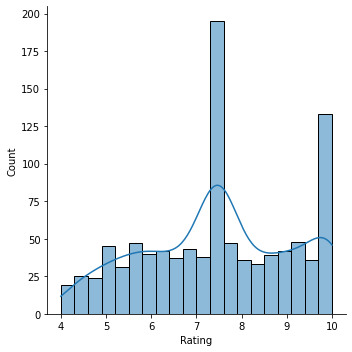

In [ ]:
sns.displot(sales_data2.Rating,bins=20,kde=True)

Imputing NULLs for Tax column

From that data we can see that Tax is 5% of the invoice is 5% of Total column .so to fill Tax 5% column NULLs cells fetching 5% of amount from Total column

In [ ]:
sales_data2["Tax 5%"]=sales_data2["Tax 5%"].fillna(sales_data2["Total"]*0.05)

In [ ]:
sales_data2["Tax 5%"].isnull().sum()

0

Mode is the common way to fill null values in categorical variable.

It is a better way to define function so that can be use multiple times.

In [ ]:
def impute_mode(col):
  print("The mode value of this field - ",sales_data2[col].mode()[0])
  sales_data2[col]=sales_data2[col].fillna(sales_data2[col].mode()[0])
  print("mode value umputied")

In [ ]:
impute_mode("Gender")

The mode value of this field -  Female
mode value umputied


In [ ]:
impute_mode("Customer type")

The mode value of this field -  Normal
mode value umputied


In [ ]:
impute_mode("Product line")

The mode value of this field -  Health and beauty
mode value umputied


In [ ]:
impute_mode("Payment")

The mode value of this field -  Ewallet
mode value umputied


In [ ]:
sales_data2.isnull().sum()

Invoice ID                   0
Branch                     194
CustomerID                   0
City                         0
Customer type                0
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                      0
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
Longitude                    0
Latitude                     0
dtype: int64

Imputing NULLs for Branch column

According to dataset Branch and City columns must be linked.so NULLs are filled by help of City column

In [ ]:
sales_data2.Branch.value_counts()

A    281
B    265
C    260
Name: Branch, dtype: int64

In [ ]:
sales_data2.Branch.unique()

array(['A', 'C', 'B', nan], dtype=object)

In [ ]:
sales_data2.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
sales_data2.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
sales_data2[["City","Branch"]].value_counts()#Here i just get to know which Branch associate with which city.

City       Branch
Yangon     A         281
Mandalay   B         265
Naypyitaw  C         260
dtype: int64

Branch A associate with Yangon

Branch B associate with Mandalay

Branch C associate with Naypyitaw

So,whenever i have Yangon i will put A, 

For Mandalay i will put B, 

And for Naypyitaw will put C

**Imputing Branch NULLs value as per City column**



In [ ]:
for i in range(len(sales_data2["Branch"])):
  if (sales_data2["Branch"].isnull()[i]==True):
    if (sales_data2["City"][i]=="Naypyitaw"):
      sales_data2["Branch"][i]="C"
    elif (sales_data2["City"][i]=="Mandalay"):
      sales_data2["Branch"][i]="B"
    elif (sales_data2["City"][i]=="Yangon"):
      sales_data2["Branch"][i]="A"
    else:
      print("invalid city")  
      

<ipython-input-30-70c796d4b1f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data2["Branch"][i]="A"
<ipython-input-30-70c796d4b1f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data2["Branch"][i]="C"
<ipython-input-30-70c796d4b1f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data2["Branch"][i]="B"


Checking NULLs cells

In [ ]:
sales_data2.isnull().sum()

Invoice ID                 0
Branch                     0
CustomerID                 0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Longitude                  0
Latitude                   0
dtype: int64

In [ ]:
sales_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   CustomerID               1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

# **Adding Fields**

Extracting month,day and weekday for Date column

In [ ]:
sales_data2["Date"]=pd.to_datetime(sales_data2["Date"])#convering to datetime type because it was in str type.

In [ ]:
sales_data2["Month"]=sales_data2["Date"].dt.month
sales_data2["Day"]=sales_data2["Date"].dt.day
sales_data2["Weekday"]=sales_data2["Date"].dt.weekday

In [ ]:
sales_data2.head(3)

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,Month,Day,Weekday
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,...,Ewallet,711.333333,4.761905,35.566667,9.1,96.1735,16.8409,2,21,3
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,...,Cash,76.400000,4.761905,15.280000,10.0,96.0785,19.7633,5,27,0
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,...,Credit card,324.310000,4.761905,0.000000,7.4,96.1735,16.8409,12,27,4


In [ ]:
sales_data2["Time"]=sales_data2["Time"].astype(str)

Extracting hour and minute from Time column

In [ ]:
sales_data2["Hour"]=sales_data2["Time"].str[11:13]

In [ ]:
sales_data2["Hour"]=pd.to_numeric(sales_data2["Hour"])#converted to numeric format

In [ ]:
sales_data2["minute"]=sales_data2["Time"].str[14:16]

In [ ]:
sales_data2["minute"]=pd.to_numeric(sales_data2["minute"])#converted to numeric format

Checking

In [ ]:
sales_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   CustomerID               1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

## **Univariate Analysis(For Quantitative Data)**

In [ ]:
def univariate_quate(col):
  sns.displot(sales_data2[col],color="grey",bins=25,kde=True)

  

  

**For Unit price** 

It helps to understand in general how the unit prices are catagories.

<Figure size 1080x288 with 0 Axes>

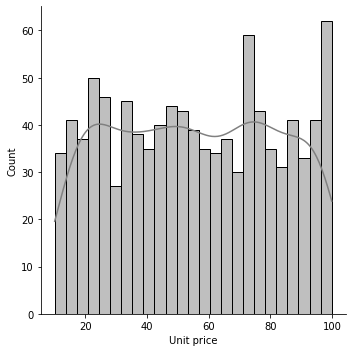

In [ ]:
plt.figure(figsize=(15,4))
univariate_quate("Unit price")

**Insights**

The unit price frequency mostly similar if you look at the line on graph in range 20 to 80

**For Total** 

<Figure size 1080x288 with 0 Axes>

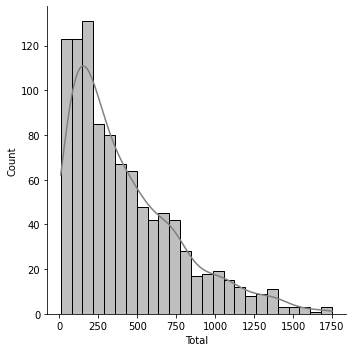

In [ ]:
plt.figure(figsize=(15,4))
univariate_quate("Total")

**Insights**

Major of the values are lying under 500

**For cogs column(cost of good sold)**

<Figure size 1080x288 with 0 Axes>

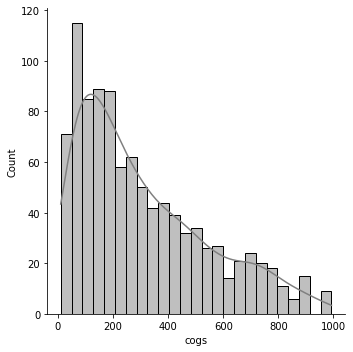

In [ ]:
plt.figure(figsize=(15,4))
univariate_quate("cogs")

**Insights**

Here mejor of the values are lying under 600.

**For Gross Income column**



<Figure size 1080x288 with 0 Axes>

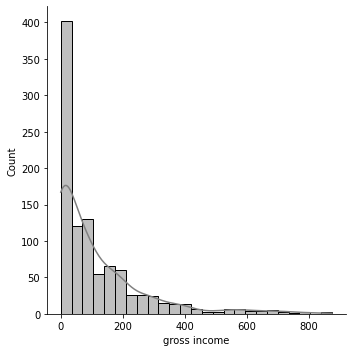

In [ ]:
plt.figure(figsize=(15,4))
univariate_quate("gross income")

**Insights**

Mostly Margin amount are same.

**For Rating column**

<Figure size 1080x288 with 0 Axes>

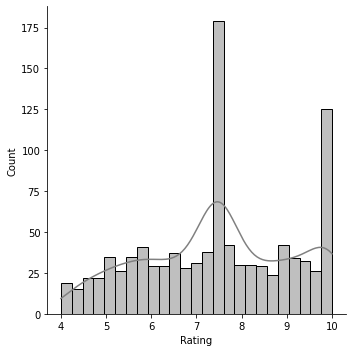

In [ ]:
plt.figure(figsize=(15,4))
univariate_quate("Rating")

**Insights**

Major of the rating are between 7 to 10 which is good sign for company

**For Quantity column**

<Figure size 1080x288 with 0 Axes>

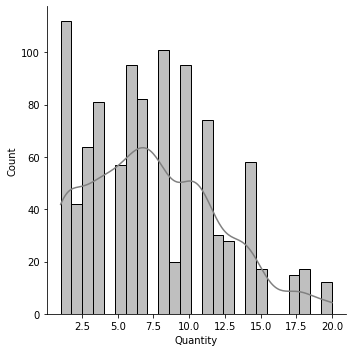

In [ ]:
plt.figure(figsize=(15,4))
univariate_quate("Quantity")

**Insights**

Mostly frequent order size are between 1 to 10

# **Univariate Analysis(For categorical Data)**

**City Column**

<AxesSubplot:>

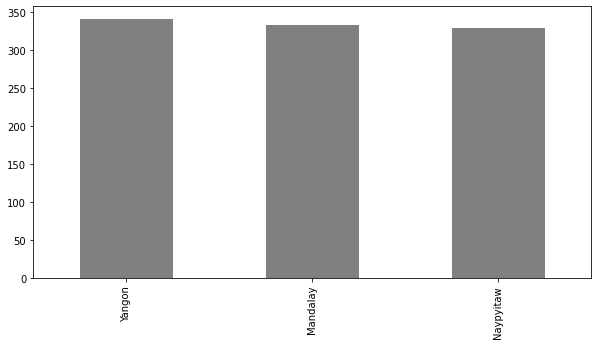

In [ ]:
sales_data2.City.value_counts().plot(kind="bar",color="grey")

**Insights**

According to the chart the availability in there 3 cities are similar.

**For Gender column**

<AxesSubplot:ylabel='Gender'>

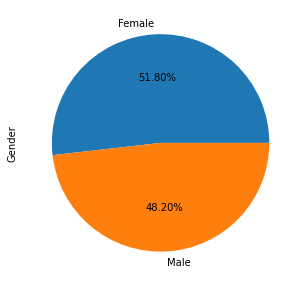

In [ ]:
sales_data2.Gender.value_counts().plot(kind="pie",autopct='%.2f%%')

**Insights**

Female customer are more compare to the male.
May be because of,In supermarket female oriented products are more as compare to male.

**For Product line column**

<AxesSubplot:>

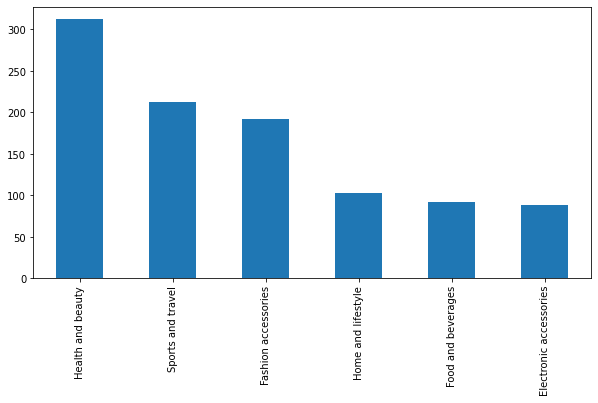

In [ ]:
sales_data2["Product line"].value_counts().plot(kind="bar")

**Insight**

Major of product lines are from 'Health and beauty','sports and travel' and 'fashion accessories'.Other 3 products line sales are not much.

**For Payment column**

<AxesSubplot:ylabel='Payment'>

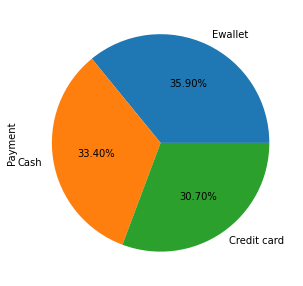

In [ ]:
sales_data2["Payment"].value_counts().plot(kind="pie",autopct="%.2f%%")

**Insights**

3source are use commonly as method of pay.

ewallet method use more as compare to other.

 **Customer type column**

<AxesSubplot:>

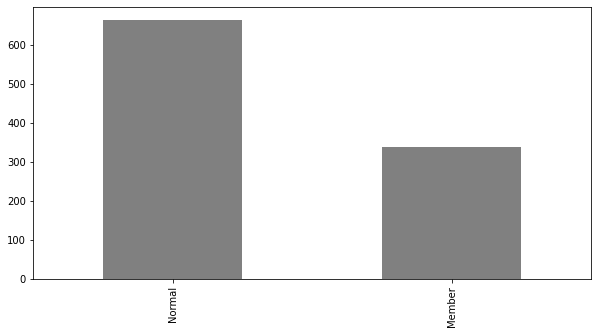

In [ ]:
sales_data2["Customer type"].value_counts().plot(kind="bar",color="grey")

**Insights**

Major of customers are Normal type customer.2/3 of customers are Normal customer

To check number of unique customer of supermarket.

<AxesSubplot:xlabel='Customer type'>

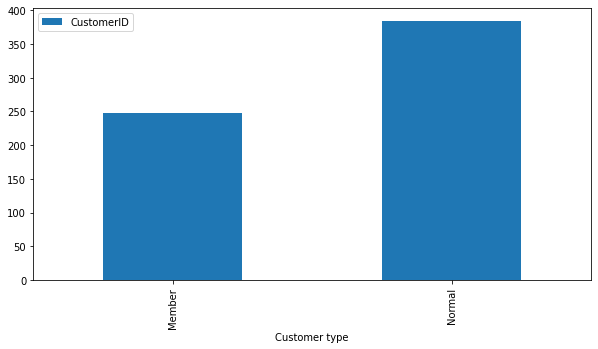

In [ ]:
sales_data2[["CustomerID","Customer type"]].groupby("Customer type").nunique().plot(kind="bar")

In [ ]:
sales_data2[["CustomerID","Customer type"]].groupby("Customer type").nunique()

,CustomerID
Customer type,
Member,248
Normal,384


**Insights**

There are 248 member and 384 normal customers are with supermarket.

It seens normal customers are much more than members .

The graph telling us members are not contributing as expected. 

**To Check Correaltion between the columns**

In [ ]:
sales_data2.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,Month,Day,Weekday,Hour,minute
Unit price,1.000000,0.020421,0.587456,0.587456,0.633866,NaN,0.373541,-0.021008,-0.025503,0.015714,-0.005059,0.022648,-0.031861,NaN,NaN
Quantity,0.020421,1.000000,0.745821,0.745821,0.651471,NaN,0.715042,0.012128,-0.181683,0.224890,0.023197,-0.010314,0.003778,NaN,NaN
Tax 5%,0.587456,0.745821,1.000000,1.000000,0.942327,NaN,0.850590,-0.019238,-0.154348,0.173671,0.010050,0.010679,-0.017974,NaN,NaN
Total,0.587456,0.745821,1.000000,1.000000,0.942327,NaN,0.850590,-0.019238,-0.154348,0.173671,0.010050,0.010679,-0.017974,NaN,NaN
cogs,0.633866,0.651471,0.942327,0.942327,1.000000,NaN,0.625543,-0.040675,-0.032557,0.014986,0.006236,0.017777,-0.012299,NaN,NaN
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.373541,0.715042,0.850590,0.850590,0.625543,NaN,1.000000,0.019059,-0.308645,0.381293,0.013629,-0.003034,-0.022577,NaN,NaN
Rating,-0.021008,0.012128,-0.019238,-0.019238,-0.040675,NaN,0.019059,1.000000,-0.129504,0.174698,-0.001487,-0.051522,0.094118,NaN,NaN
Longitude,-0.025503,-0.181683,-0.154348,-0.154348,-0.032557,NaN,-0.308645,-0.129504,1.000000,-0.858559,-0.005958,-0.027279,0.028530,NaN,NaN
Latitude,0.015714,0.224890,0.173671,0.173671,0.014986,NaN,0.381293,0.174698,-0.858559,1.000000,-0.015140,0.025972,-0.033255,NaN,NaN


**Check with heatmap**

In [ ]:
sales_data2.corr().style.background_gradient(cmap="hot")

/usr/local/lib/python3.9/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.9/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude,Month,Day,Weekday,Hour,minute
Unit price,1.000000,0.020421,0.587456,0.587456,0.633866,nan,0.373541,-0.021008,-0.025503,0.015714,-0.005059,0.022648,-0.031861,nan,nan
Quantity,0.020421,1.000000,0.745821,0.745821,0.651471,nan,0.715042,0.012128,-0.181683,0.224890,0.023197,-0.010314,0.003778,nan,nan
Tax 5%,0.587456,0.745821,1.000000,1.000000,0.942327,nan,0.850590,-0.019238,-0.154348,0.173671,0.010050,0.010679,-0.017974,nan,nan
Total,0.587456,0.745821,1.000000,1.000000,0.942327,nan,0.850590,-0.019238,-0.154348,0.173671,0.010050,0.010679,-0.017974,nan,nan
cogs,0.633866,0.651471,0.942327,0.942327,1.000000,nan,0.625543,-0.040675,-0.032557,0.014986,0.006236,0.017777,-0.012299,nan,nan
gross margin percentage,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gross income,0.373541,0.715042,0.850590,0.850590,0.625543,nan,1.000000,0.019059,-0.308645,0.381293,0.013629,-0.003034,-0.022577,nan,nan
Rating,-0.021008,0.012128,-0.019238,-0.019238,-0.040675,nan,0.019059,1.000000,-0.129504,0.174698,-0.001487,-0.051522,0.094118,nan,nan
Longitude,-0.025503,-0.181683,-0.154348,-0.154348,-0.032557,nan,-0.308645,-0.129504,1.000000,-0.858559,-0.005958,-0.027279,0.028530,nan,nan
Latitude,0.015714,0.224890,0.173671,0.173671,0.014986,nan,0.381293,0.174698,-0.858559,1.000000,-0.015140,0.025972,-0.033255,nan,nan


# **Bivariate Analysis**

To know the relation between 2 variables.

In [ ]:
def grouped_analysis(col,hue=None):
    
    
    sales_grouped= sales_data2[[col,'Total']].groupby(col).sum()                
    mean_ratings = sales_data2[[col,'Rating']].groupby(col).mean()             
    aov  = sales_data2[[col,'Total']].groupby(col).mean()                     
    mean_units_qty = sales_data2[[col,'Quantity']].groupby(col).mean()         

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,8))                    
    axes[0,0].set_title("Sales by " + col , size = 25)                           
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=10)
   
    axes[0,0].pie(sales_grouped['Total'], labels = sales_grouped.index, autopct= "%0.2f%%")


    axes[0,1].set_title("AOV by "  + col,size = 25 )                              
    axes[0,1].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=20)    
    axes[0,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=10)
    axes[0,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=10)
    sns.barplot(x=aov.index, y='Total', color="#f7a516",data=aov,ax=axes[0,1]) 
                                                    
    
    
    axes[1,0].set_title("Mean Ratings by " + col,size = 25 )                     
    axes[1,0].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,0].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_ratings.index, x='Rating', color="#305cb0",data=mean_ratings,ax=axes[1,0],orient='h')

    
    axes[1,1].set_title("Mean Units Qty by " + col,size = 25 )                   
    axes[1,1].set_xlabel( axes[0,0].get_xticklabels(),fontsize=20)
    axes[1,1].set_ylabel( axes[0,0].get_yticklabels(),fontsize=20)
    sns.barplot(y=mean_units_qty.index, x='Quantity', color="#712f80",data=mean_units_qty,ax=axes[1,1],orient='h')

    plt.tight_layout()
    


<ipython-input-58-08aa6790a380>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=10)


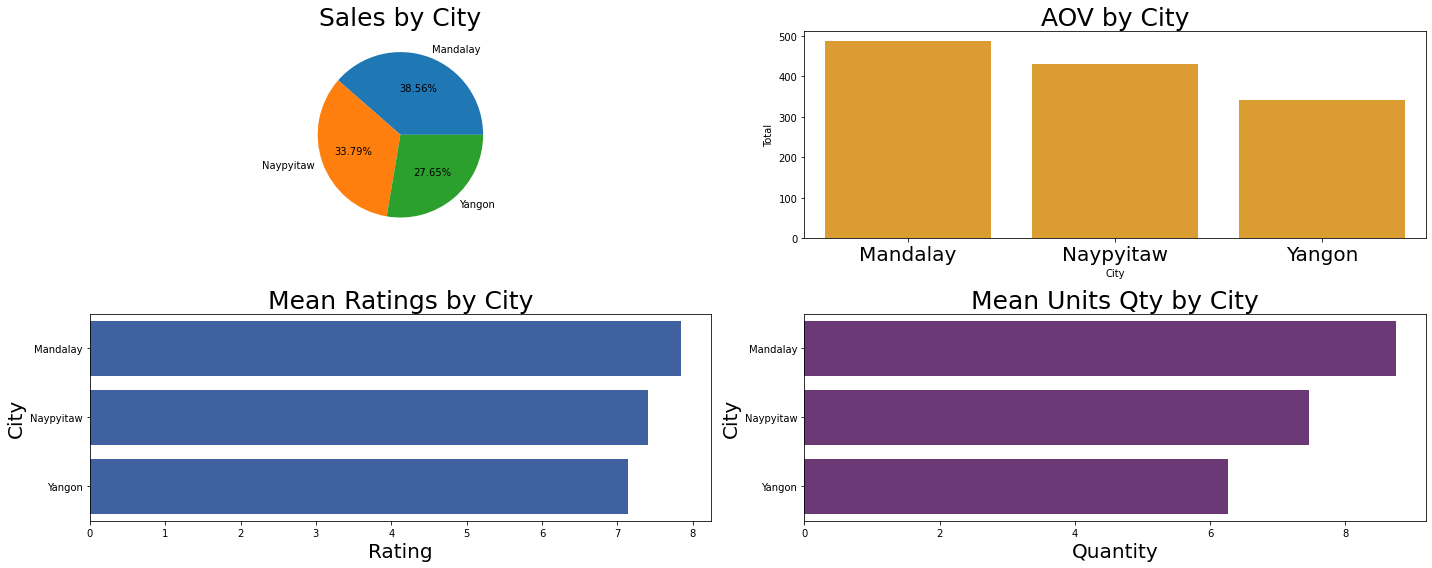

In [ ]:
grouped_analysis("City")

**Insights**

- Yangon city sales is least with 27.65%.
- The highest AOV is from Mandalay and the lowest is from Yangon.
- Average rating also low at Yangon as compare to other city.
- Average unit Qnt at mandalay is high and lowest is Yangon.
- All of above Yangon city needs improvement.

<ipython-input-58-08aa6790a380>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=10)


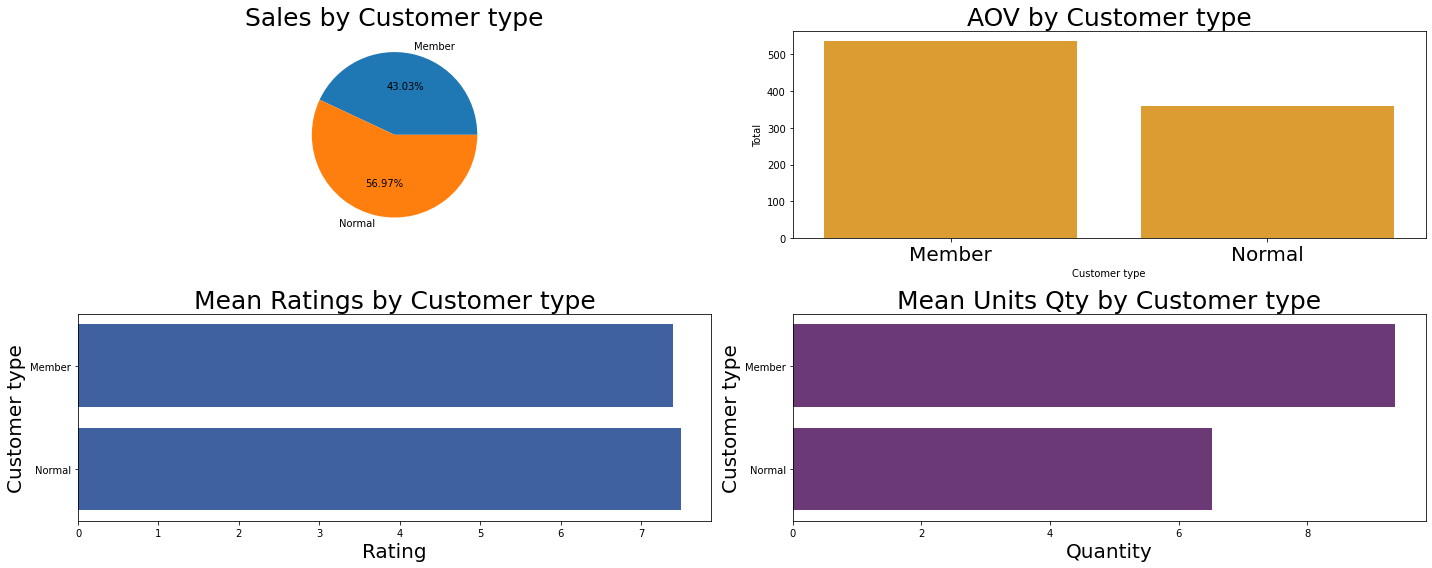

In [ ]:
grouped_analysis("Customer type")

**Insights**

- If you look at the sales according to graph sales throught members are not that much expected.
- Average rating from both customer type are quite similar.
- Major of product qnt purches by members.
- Company need to more focus on their members customer.

<ipython-input-58-08aa6790a380>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=10)


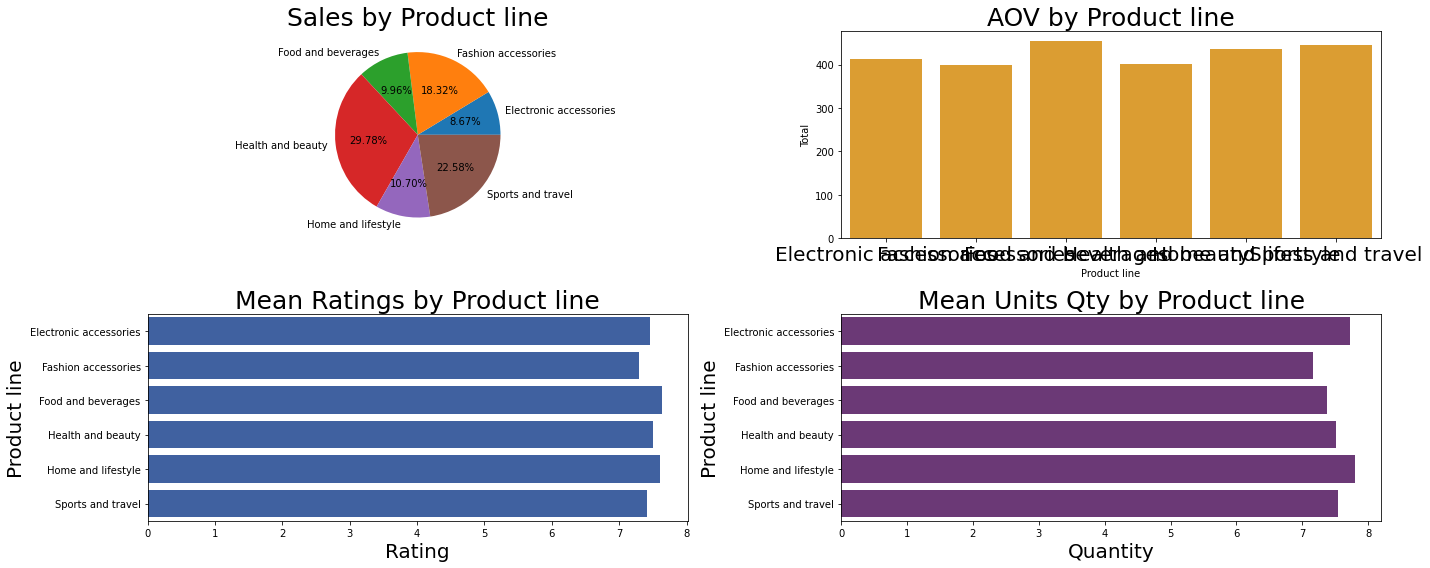

In [ ]:
grouped_analysis("Product line")

**Insights**

- According to the graph major of the sales are from 'health and beauty','sports and travel' and 'fashion accessories'.
- Highest AOV is from food and beverages.
- Every productline's average rating are between 7 to 8.
- Units Qty are also between 7 to 8.

<ipython-input-58-08aa6790a380>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=10)


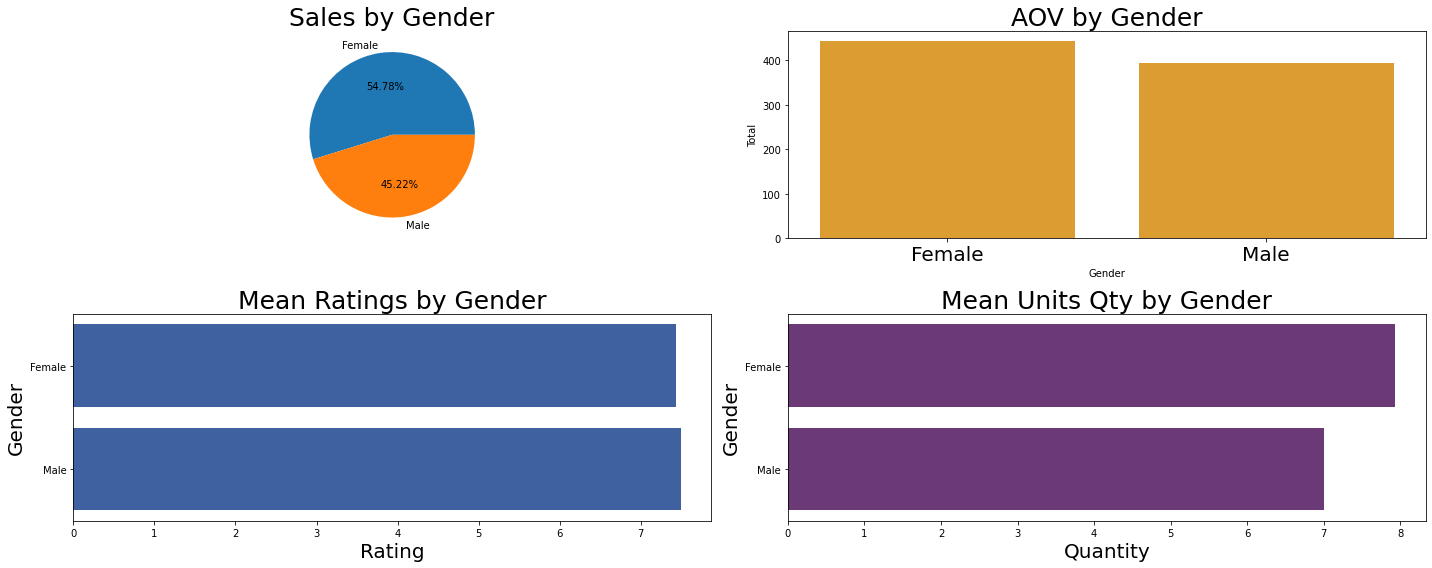

In [ ]:
grouped_analysis("Gender")

**Insights**

- Most of the customer are female . may be major of product are female oriented.
- Female AOV is high.
- Both genders average ratings are not much different.its more than 7.
- Female average units qty is high compare to male.

<ipython-input-58-08aa6790a380>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), fontsize=10)


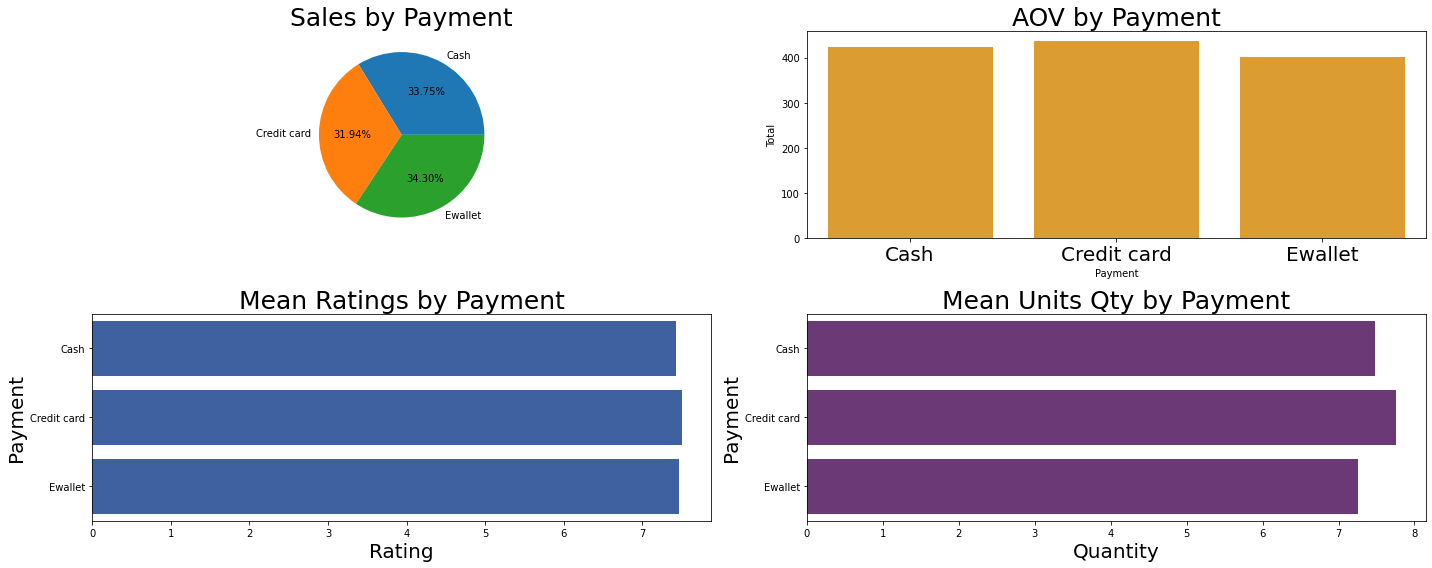

In [ ]:
  grouped_analysis("Payment")

**Insights**

- For payment customer use all payment method.
- Major of payment pay throught credit card.
- All average rating by payment method are not much different.